# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt_2

Read in the data and store it as a dataframe object called df.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-2 HERE

1. Yes, it is required to transform the object data types into int columns.
2. Yes, the label column that contains the churned vs retained labels has missing data.

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







==> ENTER YOUR RESPONSES TO QUESTIONS 1-4 HERE
1. All the columnns, or at least the majority of them, are applicable for the escenario (create an EDA focused on retention)
2. I think that  total_navigations_fav1 and  total_navigations_fav2 are not relevant to accomplish the objective of the EDA.
3. Using the .info() method I can find the missing information. I would like to delete the records if there are not too many. If there's more than 5% of the records, I would like to assign some value to them.
4. I would like to do a box plot to the main variables in order to detect outliers. If there's some outliers, I would like to assign the 50th percentile to them.


#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [27]:
### YOUR CODE HERE ###

df.head(10)


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [24]:
### YOUR CODE HERE ###

df.shape

(14999, 13)

Generate summary statistics using the `describe()` method.

In [25]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [26]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

==> ENTER YOUR RESPONSES TO QUESTIONS 1-2 HERE
1. A way to see outliers is to calculate the upper and lower bound of a numeric variable: median + 3*desvest for the upper bound, median - 3*desvest for the lower bound. Another way is to plot a box plot graph of the variable.
2. After identifying outliers, a good way to determine if is required to delete them is evaluate the folloing:
    a. Has the outlier been a result of a data entry error? If so, we need to remove it. Maybe is better to keep it in the EDA phase.

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



==> ENTER YOUR RESPONSE HERE
I think that Bar charts, Box Plots, Histograms, Line graph and Scatter plots.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

Text(0.5, 1.0, 'Sessions during the month')

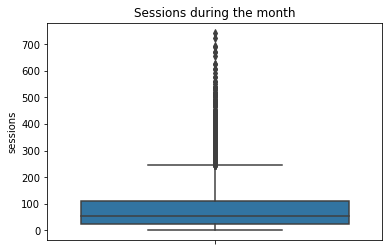

In [31]:
# Box plot
### YOUR CODE HERE ### -- after 280 we have a lot of outliers
g = sns.boxplot(data=df,
            y = 'sessions',
            showfliers=True
            );
g.set_title('Sessions during the month')


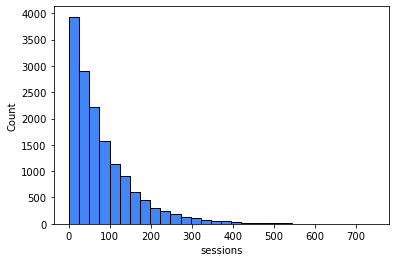

In [35]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['sessions'],bins=30, color='#4285F4', alpha=1)


The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

Text(0.5, 1.0, 'Drives during the month')

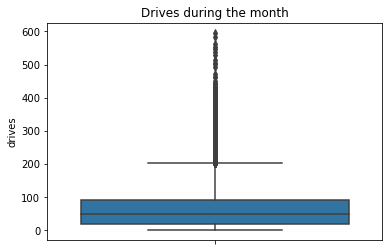

In [40]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'drives',
            showfliers=True
            );
g.set_title('Drives during the month')

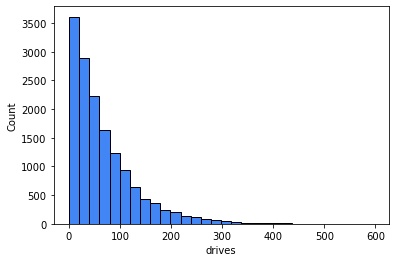

In [37]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['drives'],bins=30, color='#4285F4', alpha=1)


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

Text(0.5, 1.0, 'Total Sessions since onboarding the user')

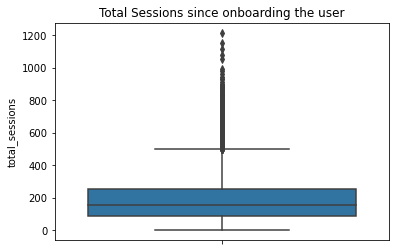

In [41]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'total_sessions',
            showfliers=True
            );
g.set_title('Total Sessions since onboarding the user')

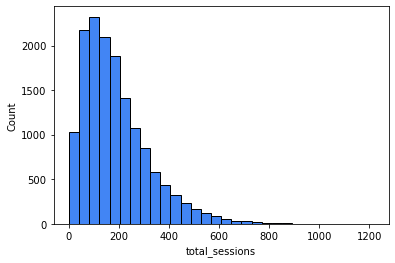

In [38]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['total_sessions'],bins=30, color='#4285F4', alpha=1)

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

Text(0.5, 1.0, 'Days after onboarding')

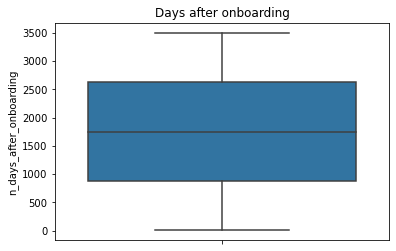

In [42]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'n_days_after_onboarding',
            showfliers=True
            );
g.set_title('Days after onboarding')

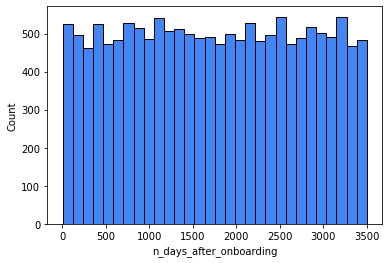

In [43]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['n_days_after_onboarding'],bins=30, color='#4285F4', alpha=1)

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

Text(0.5, 1.0, 'Total Km driven during the month')

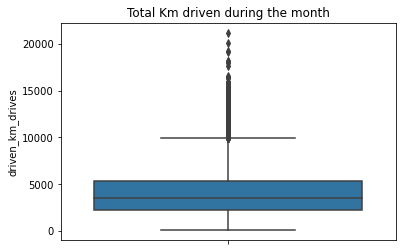

In [45]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'driven_km_drives',
            showfliers=True
            );
g.set_title('Total Km driven during the month')

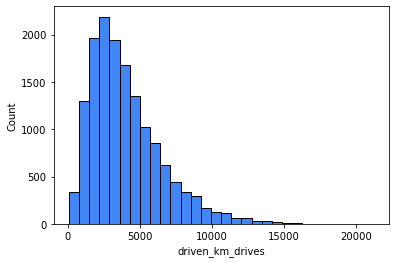

In [44]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['driven_km_drives'],bins=30, color='#4285F4', alpha=1)

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

Text(0.5, 1.0, 'duration driven in minutes during the month')

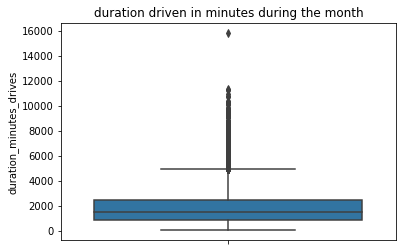

In [47]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'duration_minutes_drives',
            showfliers=True
            );
g.set_title('duration driven in minutes during the month')

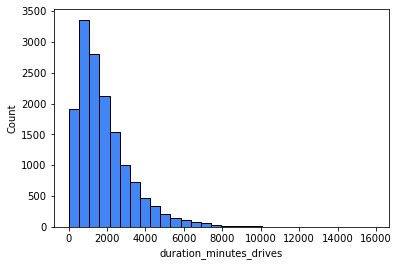

In [46]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['duration_minutes_drives'],bins=30, color='#4285F4', alpha=1)

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

Text(0.5, 1.0, 'Days opening the app in the month')

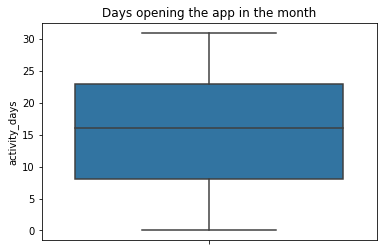

In [49]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'activity_days',
            showfliers=True
            );
g.set_title('Days opening the app in the month')

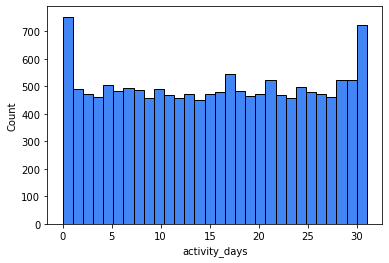

In [48]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['activity_days'],bins=30, color='#4285F4', alpha=1)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

Text(0.5, 1.0, 'Days with at least 1km of drive during the month')

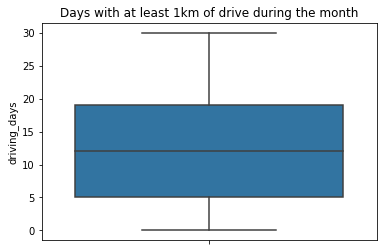

In [50]:
# Box plot
### YOUR CODE HERE ###
g = sns.boxplot(data=df,
            y = 'driving_days',
            showfliers=True
            );
g.set_title('Days with at least 1km of drive during the month')

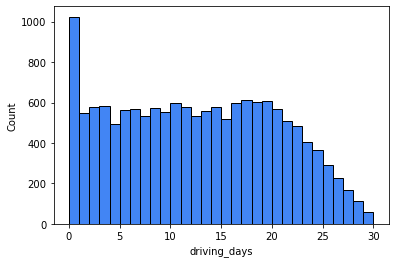

In [51]:
# Histogram
### YOUR CODE HERE ###
plot = sns.histplot(df['driving_days'],bins=30, color='#4285F4', alpha=1)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

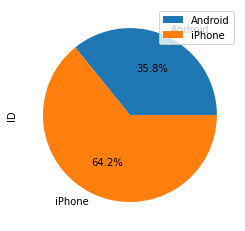

In [67]:
# Pie chart
### YOUR CODE HERE ###

df.groupby(['device']).sum().plot(kind='pie', y='ID', autopct='%1.1f%%')


There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

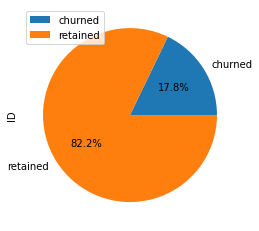

In [66]:
# Pie chart
### YOUR CODE HERE ###
df.groupby(['label']).sum().plot(kind='pie', y='ID', autopct='%1.1f%%')

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

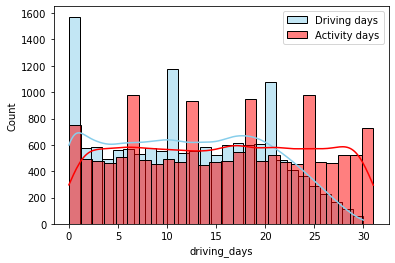

In [63]:
# Histogram
### YOUR CODE HERE ###
sns.histplot(data=df, x="driving_days", color="skyblue", label="Driving days", kde=True)
sns.histplot(data=df, x="activity_days", color="red", label="Activity days", kde=True)

plt_2.legend() 
plt_2.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [68]:
### YOUR CODE HERE ###
driving_days_max = df['driving_days'].max()
activity_days_max = df['activity_days'].max()
print("Driving Days Max")
print(driving_days_max)
print("")
print("Activity Days Max")
print(activity_days_max)


Driving Days Max
30

Activity Days Max
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

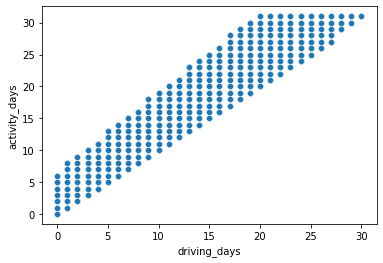

In [70]:
# Scatter plot
### YOUR CODE HERE ###
sns.scatterplot(data=df, x="driving_days", y="activity_days")

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

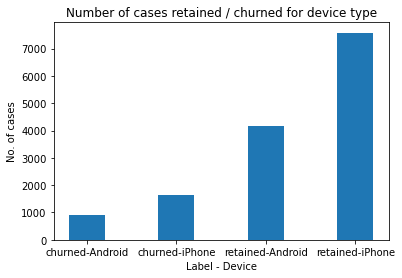

In [19]:
# Histogram
### YOUR CODE HERE ###
df_histogram = df.groupby(['label','device']).count().reset_index()

df_histogram['Label - Device'] = df_histogram['label'] + '-' + df_histogram['device']
df_histogram = df_histogram[['label', 'device', 'Label - Device', 'ID']]

plt_2.bar(df_histogram['Label - Device'], df_histogram['ID'], width = 0.4)
 
plt_2.xlabel("Label - Device")
plt_2.ylabel("No. of cases")
plt_2.title("Number of cases retained / churned for device type")
plt_2.show()


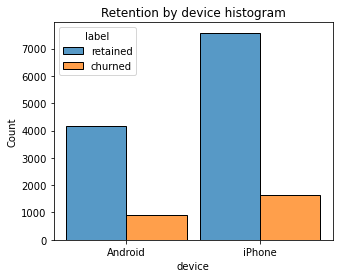

In [83]:
# Histogram
plt_2.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt_2.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [5]:
# 1. Create `km_per_driving_day` column
### YOUR CODE HERE ###
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [6]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###
df['km_per_driving_day'].replace([np.inf], 0, inplace=True)


# 2. Confirm that it worked
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

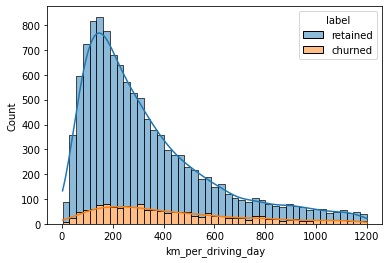

In [37]:
# Histogram
### YOUR CODE HERE ###
mask_wo_outliers = df['km_per_driving_day']<1200

sns.histplot(data=df[mask_wo_outliers], x="km_per_driving_day", label="Kms. per Driving Day", multiple="stack", hue="label"
                ,  kde=True)


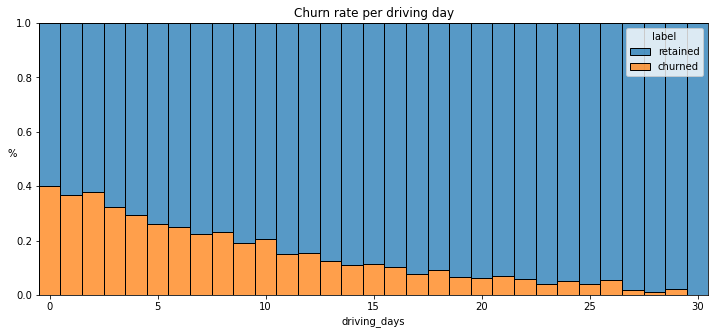

In [81]:
plt_2.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt_2.ylabel('%', rotation=0)
plt_2.title('Churn rate per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

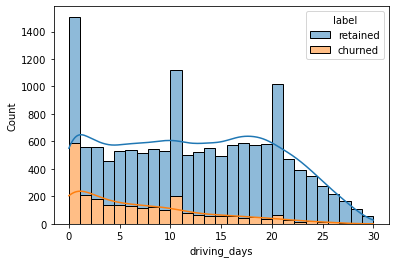

In [38]:
# Histogram
### YOUR CODE HERE ###
sns.histplot(data=df, x="driving_days", label="Driving Days", multiple="stack", hue="label"
                ,  kde=True)

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [4]:
### YOUR CODE HERE ###
df['percent_session_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [41]:
### YOUR CODE HERE ###
df['percent_session_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

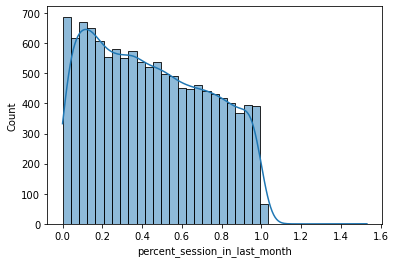

In [42]:
# Histogram
### YOUR CODE HERE ###
sns.histplot(data=df[mask_wo_outliers], x="percent_session_in_last_month", label="% of Last month sessions in total sessions"
                ,  kde=True)

Check the median value of the `n_days_after_onboarding` variable.

In [43]:
### YOUR CODE HERE ###
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

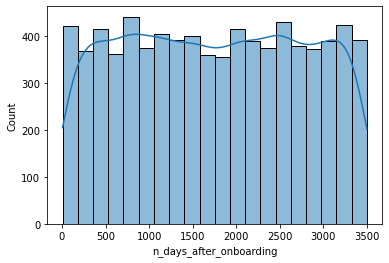

In [45]:
# Histogram
### YOUR CODE HERE ###
mask_more_40_sessions_last_month = df['percent_session_in_last_month']>=0.4
sns.histplot(data=df[mask_more_40_sessions_last_month], x="n_days_after_onboarding", label="Days after Onboarding (>40% sessions in Last Month people)"
                ,  kde=True)

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [57]:
### YOUR CODE HERE ###

def replace_upper_outlier(dataframe, column):
    '''
    docstring: replace upper outliers with the 95th percentile inside a column in a dataframe
    variables:
    dataframe: the dataframe evaluated
    column: the column evaluated
    '''
    
    df[column] = dataframe[column].clip(upper=dataframe[column].quantile(0.95))


Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [58]:
### YOUR CODE HERE ###
replace_upper_outlier(df, 'sessions')
replace_upper_outlier(df, 'drives')
replace_upper_outlier(df, 'total_sessions')
replace_upper_outlier(df, 'driven_km_drives')
replace_upper_outlier(df, 'duration_minutes_drives')

Call `describe()` to see if your change worked.

In [59]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_session_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,1.530637


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?



==> ENTER YOUR RESPONSE HERE

I have learned that:
1. 18% of users churned against 82% of users who where retained.
2. Long distance users are churning in a faster pace rather than the short distance users
3. The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.
4. The proportion of churned users to retained users is consistent between device types.
5. A lot of variables have an important proportion of outliers (`sessions`, `drives`, `total_sessions`, `driven_km_drives`, `duration_minutes_drives`)

My other questions are ....
1. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month? (driving days vs activity days)
2. Why do we have records with kilometers driven per day of  15,420 kilometers? Is there something happening with that variable?
3. What are the reasons for long-distance users to discontinue using the app?
4. Why so many  long-time users suddenly used the app so much in the last month (60% of users)?

My client would likely want to know:
1. What are the possible factors driving the churn rate
2. That long distance  users and people who didn't use the app at all last month, are the ones who churned the most.
3. What are the values of the missin `label` records referring to?

Use the following two code blocks (add more blocks if you like) to do additional EDA you feel is important based on the given scenario.

In [62]:
### YOUR CODE HERE ### 
# Defining a BG column with 0 = Not Churned and 1 = churned.
df['churned_bg'] = pd.get_dummies(df['label'])['churned']
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])
df['drives_per_days_after_onboarding'] = (df['drives']/df['n_days_after_onboarding'])
df['driving_days_per_day_after_onboarding'] = (df['driving_days']/df['n_days_after_onboarding'])
df['sessions_per_activity_day'] = (df['sessions']/df['activity_days'])
df['drives_per_driving_day'] = (df['drives']/df['driving_days'])

# Defining a final df with not nulls values
df_final = df[df['label'].notnull()] 

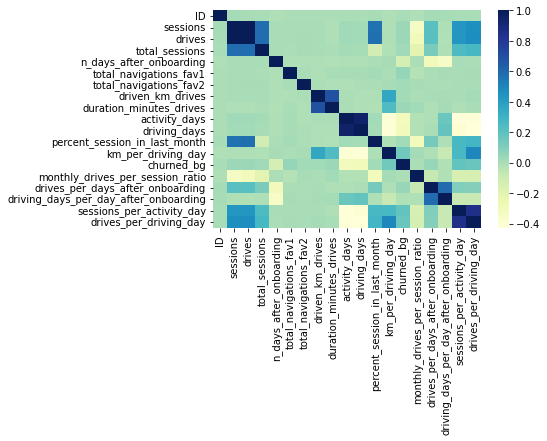

In [63]:
### YOUR CODE HERE ###
# calculating correlation matrix

# plotting correlation heatmap 
dataplot = sns.heatmap(df_final.corr(), cmap="YlGnBu") 
  
# displaying heatmap and the correlations against the churned_bg column
plt_2.show() 


In [64]:
df_final.corr()['churned_bg']

ID                                       0.004425
sessions                                 0.038045
drives                                   0.038548
total_sessions                           0.025046
n_days_after_onboarding                 -0.129263
total_navigations_fav1                   0.055537
total_navigations_fav2                   0.020051
driven_km_drives                         0.019050
duration_minutes_drives                  0.035678
activity_days                           -0.303851
driving_days                            -0.294259
percent_session_in_last_month            0.018018
km_per_driving_day                       0.148583
churned_bg                               1.000000
monthly_drives_per_session_ratio        -0.003272
drives_per_days_after_onboarding         0.051162
driving_days_per_day_after_onboarding   -0.013677
sessions_per_activity_day                0.185459
drives_per_driving_day                   0.173586
Name: churned_bg, dtype: float64

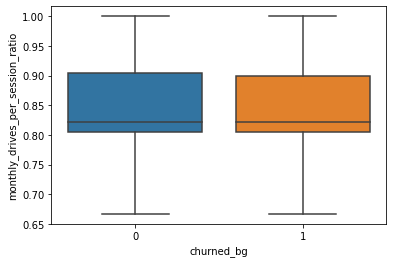

In [48]:
ax = sns.boxplot (x = df['churned_bg'], y = df['monthly_drives_per_session_ratio'], showfliers = False)


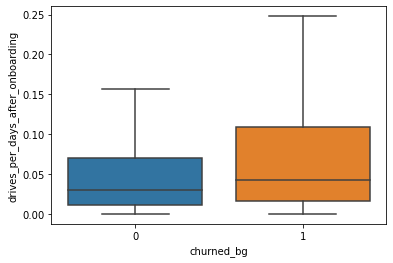

In [49]:
ax = sns.boxplot (x = df['churned_bg'], y = df['drives_per_days_after_onboarding'], showfliers = False)


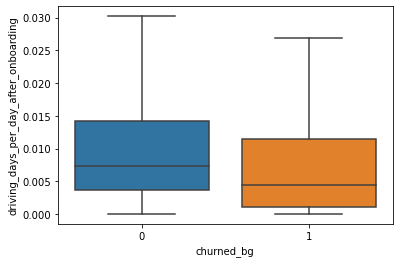

In [50]:
ax = sns.boxplot (x = df['churned_bg'], y = df['driving_days_per_day_after_onboarding'], showfliers = False)

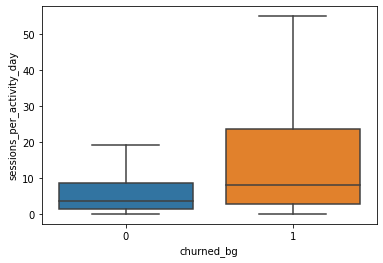

In [61]:
ax = sns.boxplot (x = df['churned_bg'], y = df['sessions_per_activity_day'], showfliers = False)

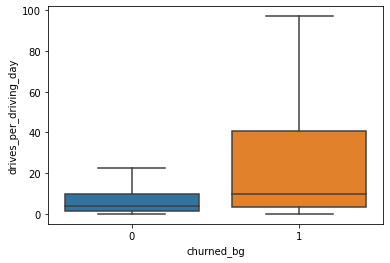

In [65]:
ax = sns.boxplot (x = df['churned_bg'], y = df['drives_per_driving_day'], showfliers = False)

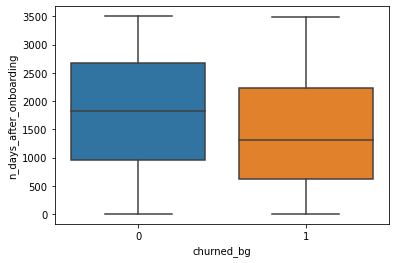

In [69]:
ax = sns.boxplot (x = df['churned_bg'], y = df['n_days_after_onboarding'], showfliers = True)

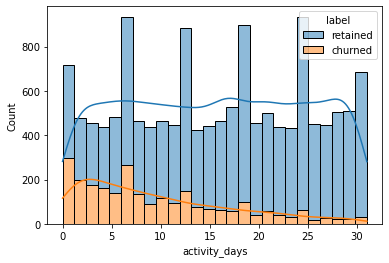

In [70]:
sns.histplot(data=df, x="activity_days", label="Activity Days", multiple="stack", hue="label"
                ,  kde=True)

### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


==> ENTER YOUR RESPONSES TO QUESTIONS 1-6 HERE

1. Two distribution types were found in the variables: right-skewed distribution ('duration_minutes_drives', 'drives_km_drives', 'sessions', 'total_sessions', 'drives') and Uniform/SemiUniform distribution ('n_days_after_onboarding', 'driving_days', 'activity_days'). This tells us that the users have similar proportions in terms of seniority using waze (not a lot of older of younger users), using the app during the month (not a lot of small users in terms of days) or driving during the month (similar amount of users driving less than more days during the month). In contrast to this, we can see that we have some dispersion with concentration in lower values for variables related to the taking of more trips, longer ones, of more duration, and the usage app in terms of sessions during the month.

2. We have 700 records with null values inside the 'label' variable, that is the one indicating the churn of the user, so there's some issue there. Also, we have some issue with the 'driven_km_drives' variable, because is indicating some 0 values as well as outliers of great magnitude (we have records with kilometers driven per day of 15,420 kilometers). In addition to that, some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

3. Yes, an initial question would be why why many long-time users suddenly used the app so much in the last month. Also, What are the reasons for long-distance users to discontinue using the app? I'd also want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. Is something happening with the data collection? Can we check that the records refer to the same month?

4. We have 17.8% of users who churned, against 82.2% of users who were retained. 

5. In general, users with less 'activity_days' and less 'driving_days' churned more (negative linear correlation of -0.3 and -0.29 respectively), which is natural, because is indicating that users who use less days the app and drive less days are the ones churning. In addition to that, users with more 'km_per_driving_day' are more likely to churn (positive correlation of 0.15). Also, users with less 'n_days_after_onboarding' are the ones who are churning as well (negative linear correlation of -0.13), even when the considerations of newer / older users in terms of usage of the app (see following question). Finally, we found that users who have more usage by day and drives by day during the month are the ones who are churning more (positive correlations of 0.18 and 0.17 respectively). This final remark should be related to the long distance users who are churning during the month. 

6. Not in strict terms. We have a uniform distribution for the 'n_days_after_onboarding' variable. However, when we compare it with the users with 'percent_session_in_last_month' greater than 40%, we also find a uniform distribution, indicating that we have a considerable proportion of tu users who are older ones in terms of days after onboarding but started to use the app this month.



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.